In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# nfragments

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1689277979_result_food101"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

from datasets import load_from_disk
dataset_train_all = load_from_disk('./_data/food101/train', keep_in_memory=True)

sns.set_theme()

In [120]:
from glob import glob
import os
import pandas as pd

resultdatas = []
labelNamess = []
setLabelCounts = {}
for setI in range(5):

    dataset_train = load_from_disk(f'./_data/food101_set{setI}/train', keep_in_memory=True)
    dataset_val = load_from_disk(f'./_data/food101_set{setI}/validation', keep_in_memory=True)

    print(dataset_train)
    print(dataset_val)
    labelNames = []
    labelCounts = []
    for labelId in dataset_train['label'].unique().tolist():
        labelNames.append(dataset_train_all.features['label'].int2str(labelId))
        labelCounts.append((len(dataset_train), len(dataset_val), sum(dataset_train['label']==labelId), sum(dataset_val['label']==labelId)))
    
    setLabelCounts[setI] = labelCounts
    print(labelNames)
    labelNamess.append(labelNames)
    data = pd.read_csv(f'_results/{RESULT_NAME}/set{setI}_CKA_BS_32_MD_16_T_0.8_TT_0.8_K_3.txt', names=['score','acc','macs','params','path','fragments'])


    originalValTrainAcc = {}
    originalFiles = sorted(glob(f'_results/{RESULT_NAME}/set{setI}_original/*.txt'))
    originalNetNames = []
    for originalFile in originalFiles:
        name = os.path.basename(originalFile)
        name = os.path.splitext(name)[0]
        originalNetNames.append(name)
        originalValTrainAcc[name] = pd.read_csv(originalFile, names=['valacc', 'trainacc','macs','params','score','fragments'])
        originalValTrainAcc[name] = originalValTrainAcc[name].iloc[0]
        originalValTrainAcc[name]['acc'] = originalValTrainAcc[name].valacc   
        originalValTrainAcc[name].name = name
        print(originalValTrainAcc[name])

    acc_minidx = data['acc'].idxmin()
    acc_maxidx = data['acc'].idxmax()
    param_minidx = data['params'].idxmin()
    param_maxidx = data['params'].idxmax()

    print('param_minidx', param_minidx)
    print('acc_maxidx', acc_maxidx)

    originalValTrainAcc['best_stitchnet'] = data.iloc[acc_maxidx]
    originalValTrainAcc['best_stitchnet'].name = 'best_stitchnet'
    # originalValTrainAcc['smallest_stitchnet'] = data.iloc[param_minidx]
    # originalValTrainAcc['smallest_stitchnet'].name = 'smallest_stitchnet'
    # originalValTrainAcc['stitchnet27'] = data.iloc[27]
    # originalValTrainAcc['stitchnet27'].name = 'stitchnet27'


    resultdata = pd.DataFrame(originalValTrainAcc.values())
    resultdata = resultdata.sort_values('acc', ascending=False)
    resultdata['setI'] = setI

    resultdatas.append(resultdata)
    
resultdata = pd.concat(resultdatas)

Dataset({
    features: ['image', 'label', 'pixel_values'],
    num_rows: 319
})
Dataset({
    features: ['image', 'label', 'pixel_values'],
    num_rows: 26
})
['beef_tartare', 'ravioli', 'tuna_tartare']
valacc                                                0.653846
trainacc                                              0.683386
macs                                               714695028.0
params                                                61100840
score                                                 0.836695
fragments    ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...
acc                                                   0.653846
Name: alexnet, dtype: object
valacc                                       0.807692
trainacc                                     0.761755
macs                                     2841274151.2
params                                        8040040
score                                        0.998054
fragments    ((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))
a

In [123]:
labelNamess

[['beef_tartare', 'ravioli', 'tuna_tartare'],
 ['caesar_salad', 'ceviche', 'tuna_tartare'],
 ['bibimbap', 'chicken_curry', 'panna_cotta'],
 ['club_sandwich', 'escargots', 'sushi'],
 ['apple_pie', 'cannoli', 'croque_madame']]

In [121]:
setLabelCounts

{0: [(319, 26, tensor(107), tensor(11)),
  (319, 26, tensor(99), tensor(8)),
  (319, 26, tensor(113), tensor(7))],
 1: [(306, 22, tensor(96), tensor(7)),
  (306, 22, tensor(97), tensor(8)),
  (306, 22, tensor(113), tensor(7))],
 2: [(291, 29, tensor(92), tensor(12)),
  (291, 29, tensor(104), tensor(10)),
  (291, 29, tensor(95), tensor(7))],
 3: [(307, 31, tensor(95), tensor(8)),
  (307, 31, tensor(115), tensor(11)),
  (307, 31, tensor(97), tensor(12))],
 4: [(299, 37, tensor(99), tensor(8)),
  (299, 37, tensor(96), tensor(16)),
  (299, 37, tensor(104), tensor(13))]}

In [42]:
np.unique(resultdata.index).tolist()

['alexnet',
 'best_stitchnet',
 'densenet121',
 'mobilenet_v3_small',
 'resnet50',
 'vgg16']

In [49]:
'\n'.join(labelNamess[0])

'beef_tartare\nravioli\ntuna_tartare'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


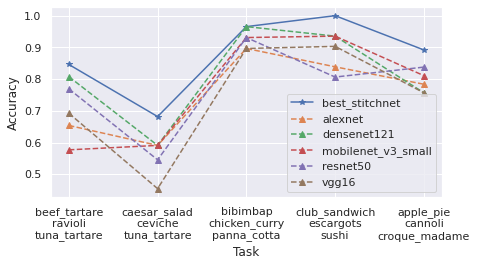

In [90]:
import matplotlib.pyplot as plt
x_values = range(5)
x_labels = [
    '\n'.join(labelNamess[i]) for i in range(5)
]

plt.figure(figsize=[7, 3.5])

for name in ['best_stitchnet',
             'alexnet',
             'densenet121',
             'mobilenet_v3_small',
             'resnet50',
             'vgg16']:
    if 'best' in name:    
        plt.plot(x_values, resultdata.loc[name]['acc'].tolist(), '*-', label=name)
    else:
        plt.plot(x_values, resultdata.loc[name]['acc'].tolist(), '^--', label=name)
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.xticks(x_values,x_labels)

plt.legend(loc='best')
plt.savefig(f'{figFolder}/accvstasks.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


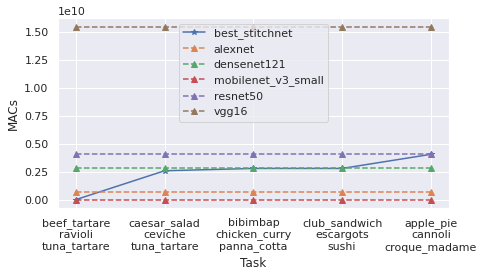

In [91]:
import matplotlib.pyplot as plt
x_values = range(5)
x_labels = [
    '\n'.join(labelNamess[i]) for i in range(5)
]

plt.figure(figsize=[7, 3.5])

for name in ['best_stitchnet',
             'alexnet',
             'densenet121',
             'mobilenet_v3_small',
             'resnet50',
             'vgg16']:
    if 'best' in name:    
        plt.plot(x_values, resultdata.loc[name]['macs'].tolist(), '*-', label=name)
    else:
        plt.plot(x_values, resultdata.loc[name]['macs'].tolist(), '^--', label=name)
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
# plt.plot(range(5), resultdata.loc['best_stitchnet']['acc'].tolist())
plt.xlabel('Task')
plt.ylabel('MACs')
plt.xticks(x_values,x_labels)

plt.legend(loc='best')
plt.savefig(f'{figFolder}/macsvstasks.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


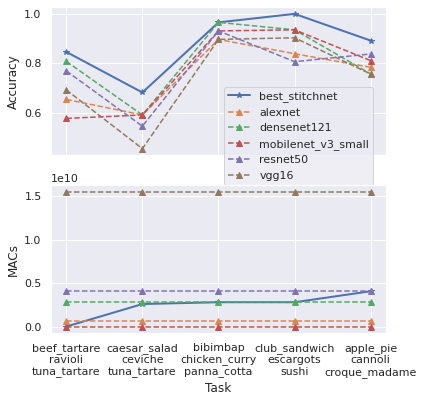

In [115]:
import matplotlib.pyplot as plt
x_values = range(5)
x_labels = [
    '\n'.join(labelNamess[i]) for i in range(5)
]

# plt.figure(figsize=[7, 3.5])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=[6, 6])

for name in ['best_stitchnet',
             'alexnet',
             'densenet121',
             'mobilenet_v3_small',
             'resnet50',
             'vgg16']:
    if 'best' in name:    
        ax1.plot(x_values, resultdata.loc[name]['acc'].tolist(), '*-', label=name, linewidth=2)
        ax2.plot(x_values, resultdata.loc[name]['macs'].tolist(), '*-', label=name, linewidth=2)
    else:
        ax1.plot(x_values, resultdata.loc[name]['acc'].tolist(), '^--', label=name)
        ax2.plot(x_values, resultdata.loc[name]['macs'].tolist(), '^--', label=name)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('MACs')
plt.xlabel('Task')
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5))
plt.xticks(x_values,x_labels)

plt.savefig(f'{figFolder}/accmacsvstasks.eps',bbox_inches='tight')


In [11]:
# originalValTrainAcc[name]

param_minidx 13
acc_maxidx 10


In [13]:
# originalValTrainAcc

In [14]:
# import pandas as pd

# resultdata = pd.DataFrame(originalValTrainAcc.values())
# resultdata = resultdata.sort_values('acc', ascending=False)

In [18]:
# resultdata[resultdata['t']==1]

,valacc,trainacc,macs,params,score,fragments,acc,path,t
best_stitchnet,NaN,NaN,2.633942e+09,5331560,0.822498,"((1, 0), (1, 1), (1, 2), (2, 12))",0.681818,_results/1689275838_result_food101/set1_CKA_BS...,1
alexnet,0.590909,0.754902,7.146950e+08,61100840,0.821845,"((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",0.590909,NaN,1
densenet121,0.590909,0.764706,2.841274e+09,8040040,0.996316,"((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))",0.590909,NaN,1
mobilenet_v3_small,0.590909,0.774510,6.010987e+07,2536800,0.999571,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5...",0.590909,NaN,1
resnet50,0.545455,0.761438,4.099839e+09,25530472,0.979585,"((3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5))",0.545455,NaN,1
vgg16,0.454545,0.771242,1.548098e+10,138357544,0.838842,"((4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5...",0.454545,NaN,1


In [42]:
# get dots to plot
macs = data['macs']
acc = data['acc']
sizes = data['params']
sizefactor = 100./max(sizes)
sizes = 25+sizes*sizefactor

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


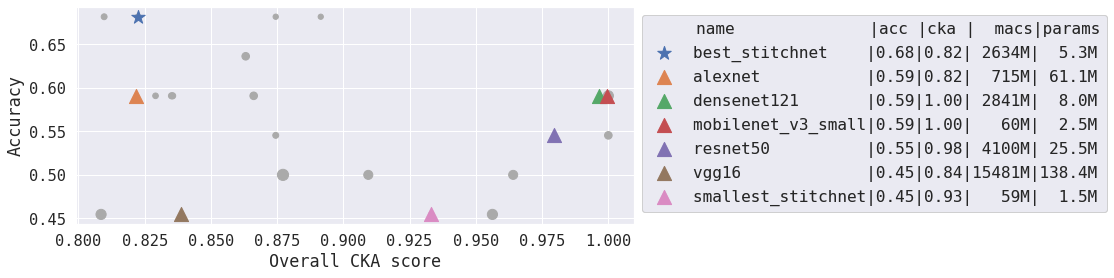

In [43]:
def pad(txt, maxL):
    if len(txt) >= maxL:
        return txt
    else:
        spaces_needed = maxL - len(txt)
        padded_txt = txt + " " * spaces_needed
        return padded_txt
    
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

maxL = 18

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(score, acc, s=sizes, color="#aaaaaa")
plt.xlabel('Overall CKA score')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4,1.2)

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if 'best' in netmeta.name or 'smallest' in netmeta.name or 'stitchnet' in netmeta.name:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
leg1._legend_box.align = "left"
ax.add_artist(leg1)
# ax.add_artist(leg2)

plt.savefig(f'{figFolder}/accvscka.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


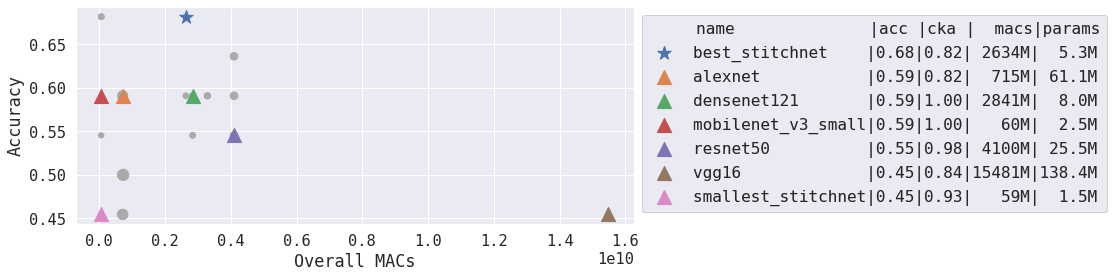

In [44]:
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(macs, acc, s=sizes, color="#aaaaaa")
plt.xlabel('Overall MACs')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4e8,0.7e8)

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if 'best' in netmeta.name or 'smallest' in netmeta.name or 'stitchnet' in netmeta.name:
        pnet = ax.scatter(netmeta.macs, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.macs, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
leg1._legend_box.align = "left"
ax.add_artist(leg1)
# ax.add_artist(leg2)

# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

plt.savefig(f'{figFolder}/accvsmacs.eps',bbox_inches='tight')

In [19]:
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from pdf2image import convert_from_path

In [20]:
print('param_minidx', param_minidx)
print('acc_maxidx', acc_maxidx)

param_minidx 8
acc_maxidx 5


In [21]:
# for idx in data['acc'].nsmallest(100).index:
#     item = data.iloc[idx]
#     if item.score > 0.9:
#         print(idx, item.score, item.acc)

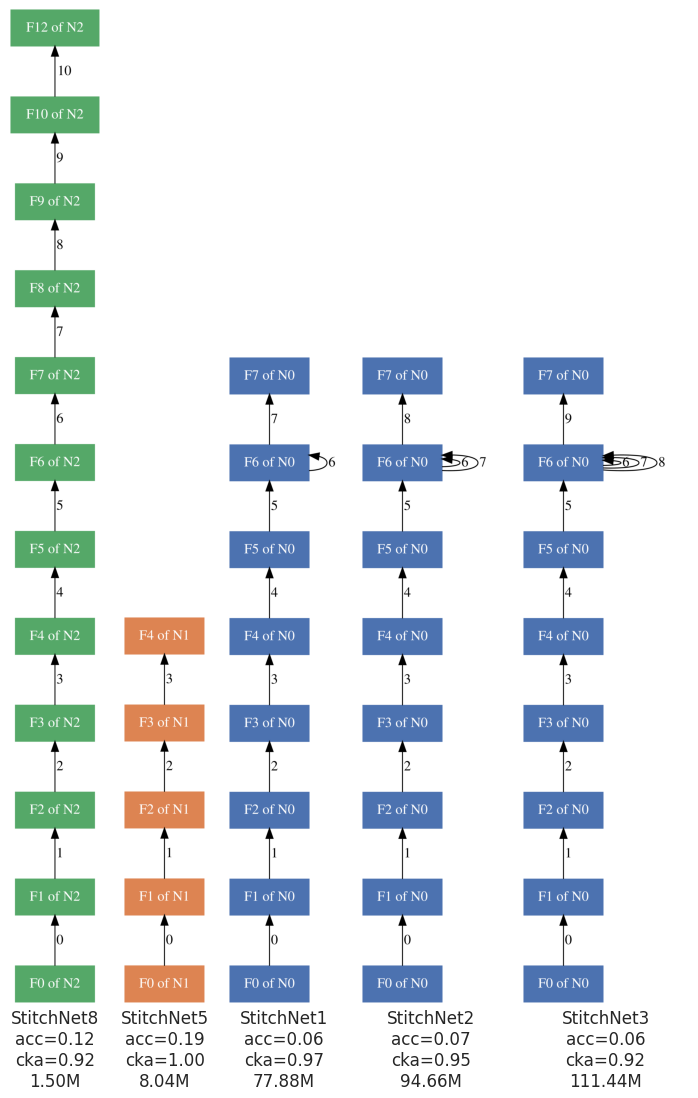

In [22]:
import os
sns.set(font_scale = 1.4)
def render_net(path):
    # if True or not os.path.exists(f"{path}.png"):
    drawing = svg2rlg(path)
    renderPDF.drawToFile(drawing, f'{path}.pdf')
    pages = convert_from_path(f'{path}.pdf', 600)
    pages[0].save(f'{path}.png', 'PNG')
    width = pages[0].width
    height = pages[0].height
    return width

def plot_net(ax, path, label):
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)

widths = []
# idxs = list(data['acc'].index)
idxs = list(set([param_minidx, acc_maxidx]))+[1,2,3]
for idx in idxs:
    netmeta = data.iloc[idx]
    width = render_net(netmeta.path)
    widths.append(width)

width_ratios = np.array(widths).astype(float)/max(widths)
# print(width_ratios)
fig, axs = plt.subplots(1,len(idxs),figsize=[10, 70],gridspec_kw={'width_ratios': width_ratios})

# def is_iterable(obj):
#     try:
#         iter(obj)
#         return True
#     except TypeError:
#         return False

for ax in axs:
    ax.set_anchor('S')

for i,idx in enumerate(idxs):
    # print(i,idx)
    netmeta = data.iloc[idx]
    pages = plot_net(axs[i],netmeta.path, f'StitchNet{idx}\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')

# netmeta = data.iloc[param_minidx]
# pages = plot_net(axs[0],netmeta.path, f'Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_maxidx]
# plot_net(axs[1],netmeta.path, f'Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[param_maxidx]
# plot_net(axs[2],netmeta.path, f'Biggest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_minidx]
# plot_net(axs[3],netmeta.path, f'Worst\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# plot_net(axs[1],data.iloc[param_maxidx].path, f'Biggest')
# plot_net(axs[2],data.iloc[acc_maxidx].path, f'Best')
# plot_net(axs[3],data.iloc[acc_minidx].path, f'Worst')
plt.tight_layout()
plt.savefig(f'{figFolder}/stitchnets.eps',bbox_inches='tight')

<AxesSubplot:>

In [66]:
# len(idxs)

In [ ]:
sns.set(font_scale = 1.6)

fig, axs = plt.subplots(1,len(originalNetNames),figsize=[10, 70],gridspec_kw={'wspace': 0.05,'width_ratios': [1,1,1.1,1,1.1]})
for ax in axs:
    ax.set_anchor('S')

for i,name in enumerate(originalNetNames): 
    if name == 'mobilenet_v3_small':
        textname = 'mobilenet'
    else:
        textname = name
    netmeta = originalValTrainAcc[name]
    plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}')
    # plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M')
    # plt.tight_layout()
    
plt.savefig(f'{figFolder}/originals.eps',bbox_inches='tight')



In [ ]:
# from glob import glob
# import pandas as pd
# import os
# import seaborn as sns
# ftdata = {}
# filenames = sorted(glob('_results/finetune/*.txt'))
# for filename in filenames:
#     name = os.path.basename(filename).split('.')[0]    
#     ftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
# # ftdata

In [ ]:
from glob import glob
import pandas as pd
import os
import seaborn as sns
ftdata = {}

nets = sorted(glob('_results/finetune/*'))
for net in nets:
    netname = os.path.basename(net)
    filenames = sorted(glob(f'{net}/*.txt'))
    allftdata = {}
    for filename in filenames:
        name = os.path.basename(filename).split('.')[0]    
        allftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
        
    netdata = {}
    xaxis = list(allftdata.values())[0].num_samples
    netdata[net] = np.array([x.acc for x in allftdata.values()])
    print(np.mean(netdata[net], 0), np.std(netdata[net], 0))

    ftdata[netname] = pd.DataFrame({
        'num_samples': xaxis,
        'acc': np.mean(netdata[net], 0),
        'accstd': np.std(netdata[net], 0)
    })
    # break

In [ ]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale = 1.4)

fig, ax = plt.subplots(1,1,figsize=[11, 5])
sns.set(font_scale = 1.4)

idxs = list(data['acc'].nlargest(1).index)
netmeta = data.iloc[idxs[0]]
k,series = list(ftdata.items())[0]
ax.scatter([32], netmeta.acc, marker="*", s=160, 
           color="red", label=f"StitchNet21\nacc@32={netmeta.acc:.2f}")
for k,series in ftdata.items():
    label = f'{k}\nacc@{max(series.num_samples)}={series.acc.iloc[-1]:.2f}±{series.accstd.iloc[-1]:.2f}'
    ax.errorbar(series.num_samples, series.acc, series.accstd, label=label, linestyle='-', marker='.', markersize=15)
    # ax.plot(series.num_samples, series.acc, '.-', markersize=15, label=label)
# plt.xlim(0,400)
plt.ylim(-0.1, 1)
ax.legend(loc=4, ncol=2)
plt.xlabel('The number of training samples processed')
plt.ylabel('Accuracy')

plt.savefig(f'{figFolder}/finetune.eps',bbox_inches='tight')

In [ ]:
import pandas as pd

figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

ensembleData = pd.read_csv(f'_results/{RESULT_NAME}_ensemble_10_T_0.8.txt', names=['acc', 'indvacc'])
accs = ensembleData.acc
indvaccs = ensembleData.indvacc

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(font_scale = 1.4)

plt.figure(figsize=(10,4))
plt.plot(range(1,1+len(accs)), [d for d in accs], label='Ensemble Accuracy')
plt.scatter(range(1,1+len(indvaccs)), [d for d in indvaccs], s=80, label='Individual Accuracy')
plt.xlabel('Model in the ensemble')
plt.xticks(range(1,len(indvaccs)+1))
# plt.ylim(0.4,1)
plt.ylabel('Accuracy')
lgd = plt.legend(loc=3)


plt.savefig(f'{figFolder}/ensemble.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')